# Regressão - Preço de Venda da Casa

Este notebook realiza um estudo, um conjunto de experimentos, de algoritmos de regressão sobre o dataset [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction). Um conjunto de dados que reúne mais de 21 mil casas e 21 atributos, tais como preço, número de quartos, número de banheiros, andares, nota da casa, entre outros. Nosso objetivo é predizer o valor de uma casa baseado nas características da casa.

> Conteúdo voltado para iniciantes na área de Aprendizado de Máquina e Ciência de Dados!

<a id="top"></a>

## Conteúdo

> **Nota**. Alguns códigos foram ocultados a fim de facilitar a leitura e dar destaque para os conteúdos mais importantes.

O notebook está organizado como segue:

- [Dados](#data) - Carregamento dos dados, pré-processamento.
- [Visualização](#visual) - Análise exploratória dos dados.
- [Regressão](#regression) - Aplicação de algoritmos de Aprendizado de Máquina.
    - [KNN Regressor](#knn) - Regressão com k-NN.
    - [Regressão Linear](#reg) - Regressão com Regressão Linear.
    - [Support Vector Machines](#svm) - Regressão com Support Vector Machines.
    - [Árvore de Decisão](#decision) - Regressão com Decision Tree.
    - [Random Forest](#forest) - Regressão com Random Forest.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install auto-sklearn==0.12.0
!pip install scikit-learn==0.23.2

<a id="data"></a>

-----

# Dados

Esta seção reúne um conjunto de código para carregamento e pré-processamento sobre os dados.

[Voltar para o Topo](#top)


## Carregamento dos Dados

In [2]:
# processamento de dados, algebra linear
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/kc_house_data.csv")
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6951,3123049142,20140805T000000,452000.0,3,2.25,2600,14810,1.0,0,2,...,8,1490,1110,1956,0,98166,47.4326,-122.341,2450,16715
17880,2324039077,20150427T000000,306000.0,2,1.00,930,5650,1.0,0,2,...,7,930,0,1941,0,98126,47.5478,-122.377,1340,6400
1370,7812800310,20140625T000000,260000.0,2,1.00,1120,5650,1.0,0,0,...,6,1120,0,1944,0,98178,47.4979,-122.241,1270,6875


## Seleção dos Dados

Nesta seção observamos os dados e selecionamos apenas aqueles que são interessantes para os modelos de regressão. Além disso, não será proposto nenhum _feature engineer_ para enriquecimento dos dados ou tratamendo dos dados.

**Descrição dos Dados**

- id - ID unico para cada casa.
- date - Data da casa a venda.
- price - Preço da cada.
- bedrooms - Número de quartos.
- bathrooms - Número de banheiros, no qual .5 conta como lavabo.
- sqft_living - M2 do espaço interior.
- sqft_lot - M2 do espaço do terreno.
- floors - Número de andares.
- waterfront - Tem vista para o mar (1) ou não (0). (categórico)
- view - Valor de 0 a 4 informando se a vista é boa. (categórico)
- condition - Valor de 1 a 5 sobre a condição da casa. (categórico)
- grade - Nota de 1 a 13, no qual 1-3 pequenas construções, 7 construção e desing mediano, e 11-13 para construções de alto nível.
- sqft_above - M2 do interior da casa, acima do nível do solo.
- sqft_basement - M2 do interior da casa, abaixo do nível do solo.
- yr_built - Ano de construção da casa.
- yr_renovated - Último ano de renovação da casa.
- zipcode - CEP da residência.
- lat - Latitude.
- long - Longitude.
- sqft_living15 - M2 do espaço interno para os 15 vizinhos mais próximos.
- sqft_lot15 - M2 do terreno para os 15 vizinhos mais próximos.

In [4]:
columns_to_remove = ['id', 'date', 'yr_renovated', 'zipcode']
df = df.drop(columns_to_remove, axis=1)
df.sample(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
21569,329000.0,2,2.50,980,1020,3.0,0,0,3,8,980,0,2008,47.6844,-122.387,980,1023
7298,525000.0,5,3.25,2480,10277,2.0,0,0,5,8,1640,840,1993,47.7726,-122.286,2270,10277
14679,220000.0,3,1.75,1290,8250,1.0,0,0,3,7,1290,0,1983,47.3353,-122.270,1410,7823


Visualizando a estatística descritiva dos imóveis a venda.

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
lines, columns = df.shape
print('linhas :', lines)
print('colunas:', columns)

linhas : 21613
colunas: 17


## Conjunto de Treinamento e Teste

Nesta seção vamos separa os valores de `X` e `Y`, em seguida normalizar os valores de `X`, por fim, separar entre conjunto de dados de treinamento e teste.

> A normalização se faz necessária, pois alguns algoritmos se beneficiam de valores normalizados, tal como o K-NN.

In [7]:
# recupera os valores (X), e as classes (Y)
X = df.drop('price', axis=1)
Y = df['price']

### Normalização dos Dados

Nesta seção vamos utilizar a normalização [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Esta função de preprocessamento normaliza os dados conforme segue:

$$x_{new} = \frac{(x - \overline{x})}{\sigma}$$

Ou seja, o novo valor $x_{new}$ é resultado da normalização do $x$, utilizando a média $\overline{x}$ e o desvio padrão $\sigma$.

In [8]:
# normalizador
from sklearn.preprocessing import StandardScaler

In [9]:
# normalização dos dados
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

### Conjuntos de Dados

In [10]:
# treinamento, test split
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=26)

In [12]:
print('treinamento:', len(y_train))
print('teste      :', len(y_test))

treinamento: 17290
teste      : 4323


<a id="visual"></a>

-----

# Visualização dos Dados

Esta seção reúne um conjunto de visualizações sobre os dados.

[Voltar para o Topo](#top)


In [13]:
# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

### Qual a correlação dos atributos?

`DataFrame.corr()` calcula a correlação de pares de colunas, excluindo `NaN` e valores nulos. Por padrão é computado a [Correlação de Pearson](https://www.statisticssolutions.com/pearsons-correlation-coefficient/), seu coeficiente de correlação mede a relação estatística, ou associação, entre duas variáveis contínuas.

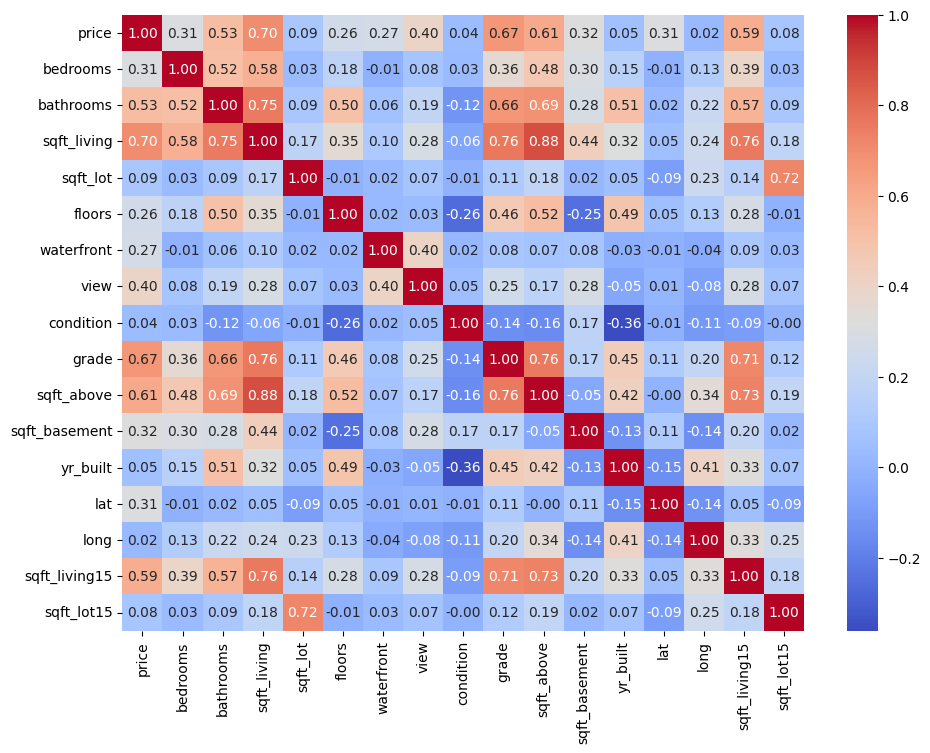

In [14]:
# extraí a correlação dos dados
corr = df.corr(method='pearson')

# heatmap - gráfico de calor
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
# print(corr)

### Histograma dos Valores por Atributo

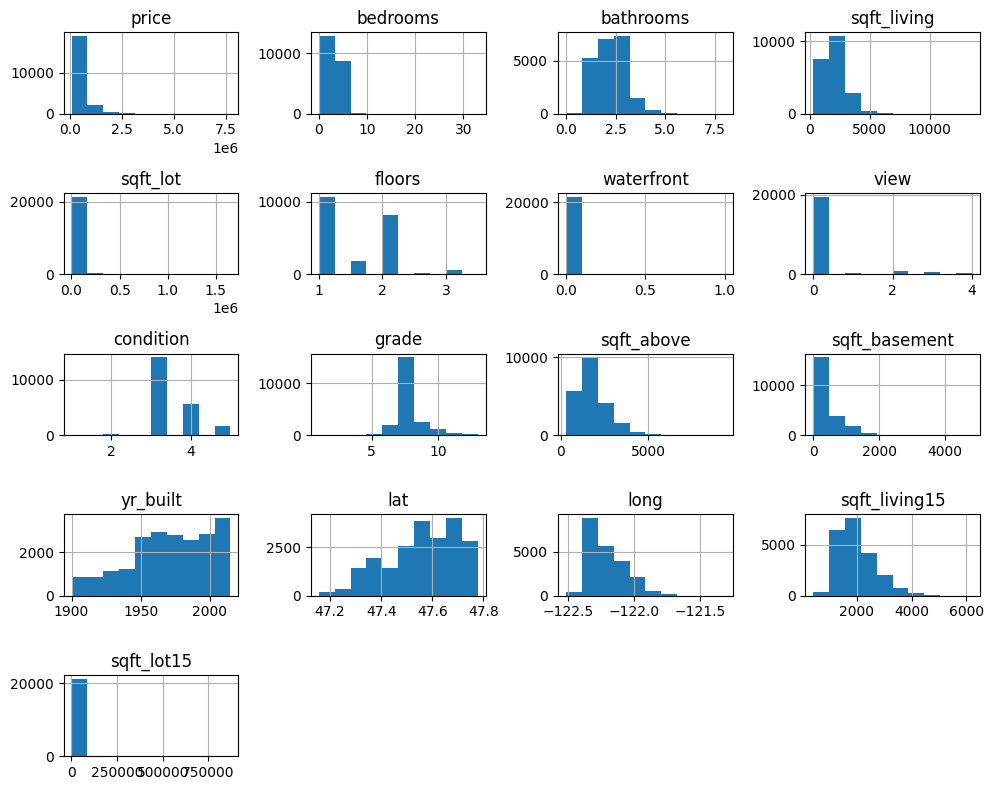

In [15]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

<a id="regression"></a>

-----

# Regressão

Esta seção reúne um conjunto de experimentos. Cada subseção é um algoritmo de Aprendizado de Máquina.


[Voltar para o Topo](#top)

In [22]:
# métricas
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
# variável de resultado final
# será armazenado o resultado de todos experimentos
experiment = {}

<a id="knn"></a>

## K-NN Regressor

_(k-Nearest Neighbors)_

In [77]:
# regressor
from sklearn.neighbors import KNeighborsRegressor

In [78]:
model1 = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

### Avaliação

In [79]:
y_pred = model1.predict(X_test)

In [80]:
# R²
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE (novo método)
rmse = root_mean_squared_error(y_test, y_pred)


In [81]:
experiment['KNN'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7914695957341807
MAE : 93907.13432030226
MSE : 28821924310.349525
RMSE: 169770.21031485332


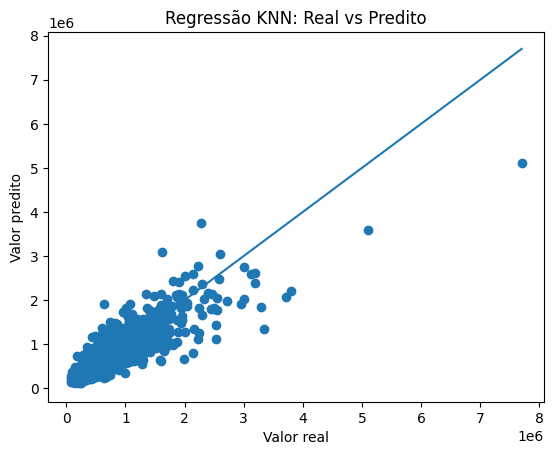

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Regressão KNN: Real vs Predito")
plt.show()


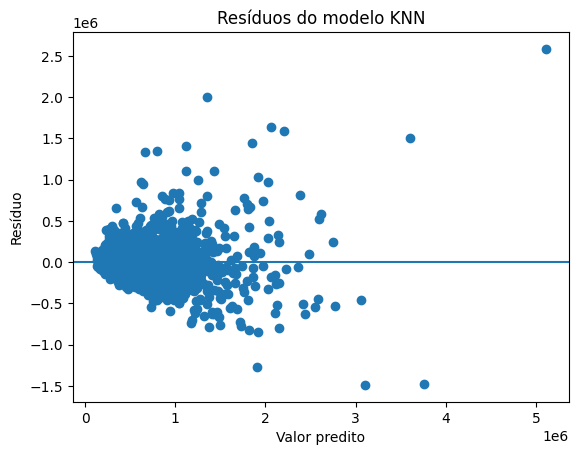

In [83]:
residuos = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuos)
plt.axhline(0)
plt.xlabel("Valor predito")
plt.ylabel("Resíduo")
plt.title("Resíduos do modelo KNN")
plt.show()


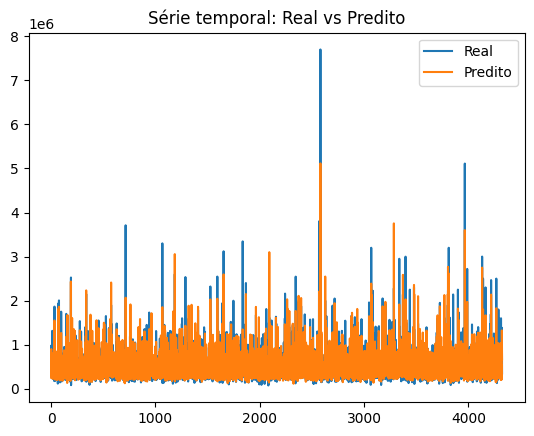

In [84]:
plt.figure()
plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Predito")
plt.legend()
plt.title("Série temporal: Real vs Predito")
plt.show()


O gráfico de valores observados versus valores preditos indica que o modelo KNN apresenta bom desempenho para valores baixos e intermediários da variável resposta, entretanto, observa-se subestimação sistemática para valores elevados, comportamento esperado dado o caráter não paramétrico e não extrapolativo do método.

**Discussão KNN Regressor**   

k-NN obteve um R² próximo de 79%, ou seja, representou bem a função de preços.

-----

<a id="reg"></a>

## Regressão Linear

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [86]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)


### Avaliação

In [87]:
# R²
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
experiment['Regressão Linear'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)


R2  : 0.7013037784009919
MAE : 126731.02452905865
MSE : 41284147129.64293
RMSE: 203185.00714777882


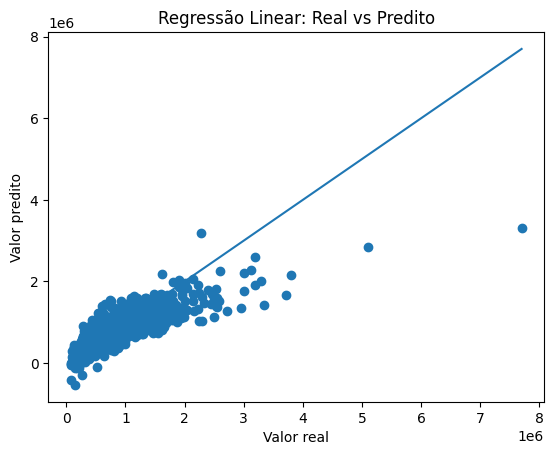

In [88]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Regressão Linear: Real vs Predito")
plt.show()


Os resultados indicam que a regressão linear apresentou desempenho inferior ao modelo KNN, com subestimação acentuada para valores elevados da variável resposta e maior dispersão dos resíduos. Tal comportamento sugere a presença de relações não lineares entre as variáveis explicativas e a variável dependente.

**Discussão Regressão Linear**   

Regressão Linear obteve um resultado inferior ao k-NN, com R² de 70%.

-----

<a id="svm"></a>

## Support Vector Machines (SVM)

In [89]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [90]:
model3 = SVR()
model3.fit(X_train, y_train)

SVR()

### Avaliação

In [91]:
y_pred = model3.predict(X_test)

In [92]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

experiment['SVR'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : -0.05103875644965217
MAE : 221281.0798586352
MSE : 145268789902.7929
RMSE: 381141.4303153003


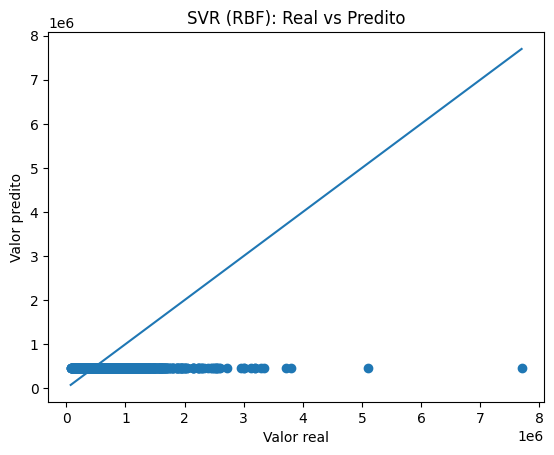

In [93]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("SVR (RBF): Real vs Predito")
plt.show()


O modelo SVR apresentou underfitting acentuado, com previsões excessivamente concentradas e incapazes de acompanhar a variabilidade da variável resposta, mesmo para valores extremos, evidenciando inadequação do modelo sob a configuração padrão.

**Discussão Support Vector Machines (SVM)**   

SVM não conseguiu nem atinguir o caso médio, pois seu R² está negativo.

-----

<a id="decision"></a>

## Árvore de Decisão

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [95]:
model4 = DecisionTreeRegressor(random_state=26)
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=26)

### Avaliação

In [96]:
y_pred = model4.predict(X_test)

In [97]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

experiment['Decision Tree'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)


R2  : 0.7185009693559343
MAE : 100239.12063381911
MSE : 38907246083.49069
RMSE: 197249.1979286372


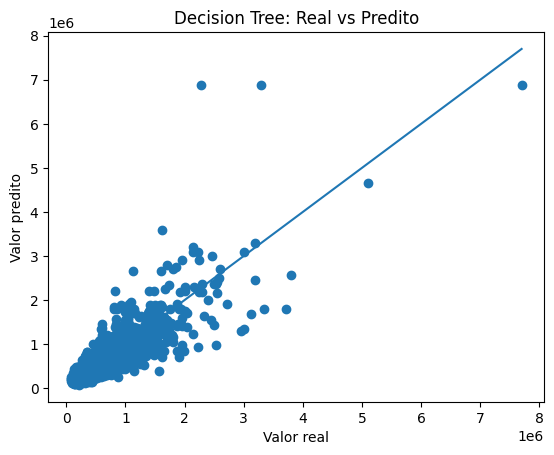

In [98]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Decision Tree: Real vs Predito")
plt.show()


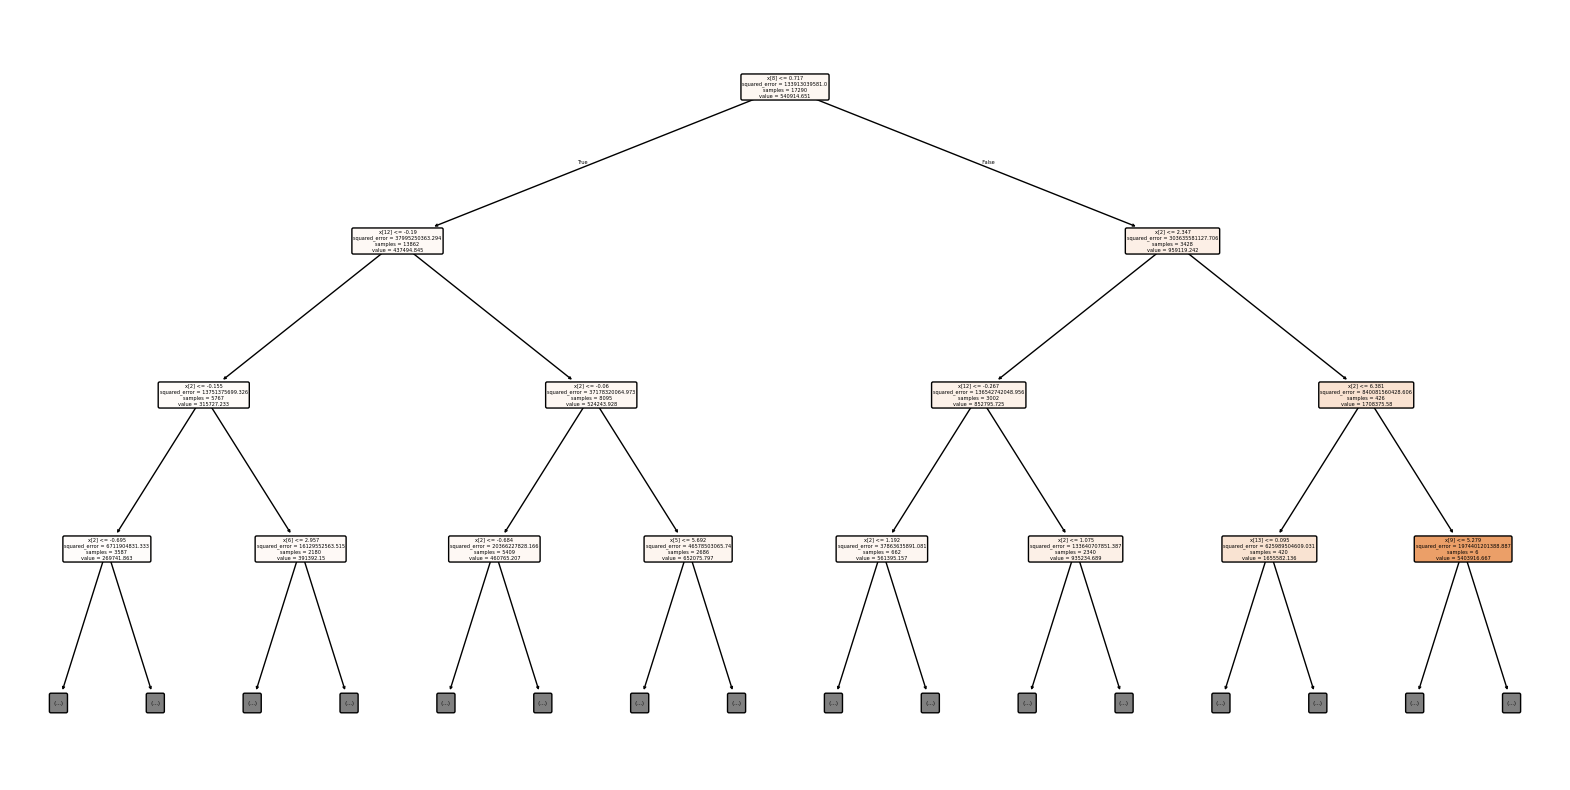

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model4,
    max_depth=3,
    filled=True,
    rounded=True
)
plt.show()


### Visualização

Quando essa variável está abaixo do limiar, a produção média cai significativamente; quando acima, a produção tende a níveis mais elevados.

**Discussão Árvore de Decisão**   

Árvore de Decisão obteve um resultado similar à Regressão Linear, com R² de 71%.

-----

<a id="forest"></a>

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [101]:
model5 = RandomForestRegressor(n_estimators=100, random_state=26)
model5.fit(X_train, y_train)

RandomForestRegressor(random_state=26)

### Avaliação

In [102]:
y_pred = model5.predict(X_test)

In [103]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

experiment['Random Forest'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)


R2  : 0.8800036556900233
MAE : 70004.7895734829
MSE : 16585234011.305698
RMSE: 128783.67136910524


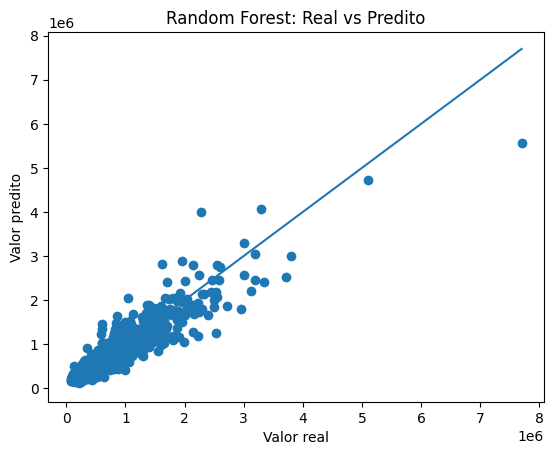

In [104]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Random Forest: Real vs Predito")
plt.show()


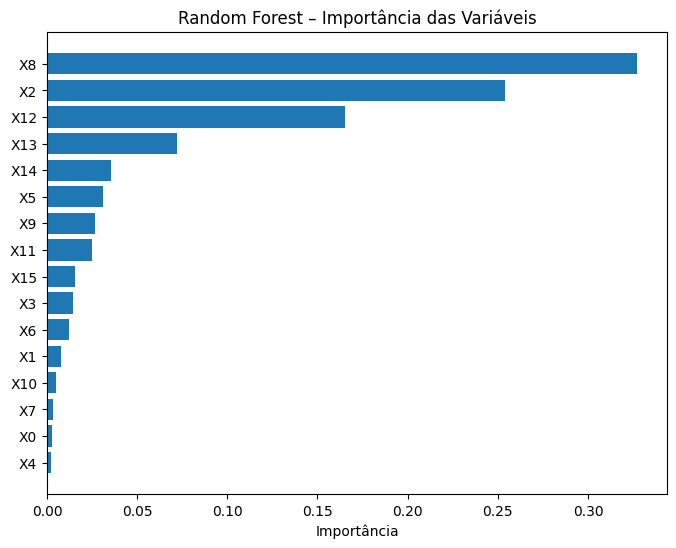

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model5.feature_importances_
features = X_train.columns if hasattr(X_train, "columns") else [f"X{i}" for i in range(X_train.shape[1])]

imp_df = pd.DataFrame({
    'Variavel': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(imp_df['Variavel'], imp_df['Importancia'])
plt.xlabel("Importância")
plt.title("Random Forest – Importância das Variáveis")
plt.show()


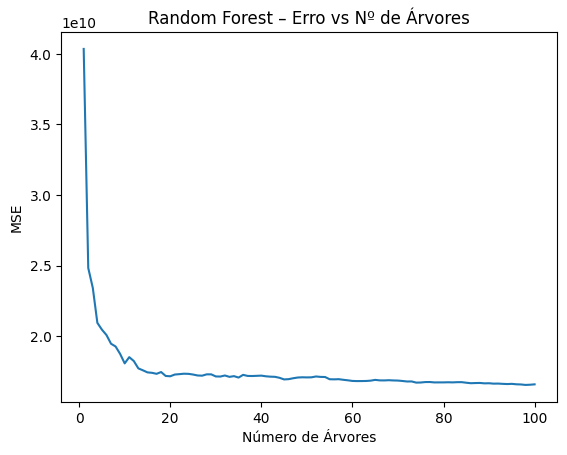

In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

errors = []
for i in range(1, len(model5.estimators_) + 1):
    preds = np.mean([tree.predict(X_test) for tree in model5.estimators_[:i]], axis=0)
    errors.append(mean_squared_error(y_test, preds))

plt.figure()
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel("Número de Árvores")
plt.ylabel("MSE")
plt.title("Random Forest – Erro vs Nº de Árvores")
plt.show()


**Discussão Random Forest**   

Random Forest obteve o melhor resultado até o momento, R² de 88%.   

Além disso, Random Forests são um dos algoritmos mais utilizados em competições de Aprendizado de Máquina.

> **Nota**. Possui alto custo computacional, pois tem que treinar vários modelos.

-----

# Conclusão

Por fim, o melhor algoritmo foi o Random Forest com R² de 88%.   
As demais estratégias de ensemble, Bagging e Ensemble, também apresentaram bons resultados.

In [107]:
# palheta de cores
import seaborn as sns

In [108]:
cm = sns.color_palette('Blues_r', as_cmap=True)
pd.DataFrame(experiment).T.style.background_gradient(subset=['R2'], cmap=cm).highlight_max(subset=['R2'], axis=0)

,R2,MAE,MSE,RMSE
KNN,0.791470,93907.134320,28821924310.349525,169770.210315
Regressão Linear,0.701304,126731.024529,41284147129.642929,203185.007148
SVR,-0.051039,221281.079859,145268789902.792908,381141.430315
Decision Tree,0.718501,100239.120634,38907246083.490692,197249.197929
Random Forest,0.880004,70004.789573,16585234011.305698,128783.671369


| Modelo               |       R² ↑ |      MAE ↓ |      RMSE ↓ | Avaliação Geral       |
| -------------------- | ---------: | ---------: | ----------: | --------------------- |
| **Random Forest**    | **0.8800** | **70.004** | **128.783** | ⭐⭐⭐⭐⭐ (Melhor modelo) |
| **KNN**              |     0.7915 |     93.907 |     169.770 | ⭐⭐⭐⭐                  |
| **Decision Tree**    |     0.7185 |    100.239 |     197.249 | ⭐⭐⭐                   |
| **Regressão Linear** |     0.7013 |    126.731 |     203.185 | ⭐⭐                    |
| **SVR**              |    -0.0510 |    221.281 |     381.141 | ⭐ (Falhou)            |


De forma geral, os resultados indicam que modelos baseados em árvores, especialmente o Random Forest, são mais adequados para o problema analisado, superando modelos lineares e métodos baseados em distância. Assim, o Random Forest se apresenta como a melhor alternativa para fins preditivos, enquanto os demais modelos podem servir como referência comparativa ou baseline.